In [1]:
import os
import sys

In [2]:
spark_path = "E:/spark"

In [3]:
os.environ['SPARK_HOME'] = spark_path

In [4]:
os.environ['HADOOP_HOME'] = spark_path

In [5]:
os.environ['PYSPARK_PYTHON'] = sys.executable

In [6]:
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

In [7]:
from pyspark import SparkContext
from pyspark import SparkConf

sc = SparkContext("local", "test")

print sc

In [8]:
import random
NUM_SAMPLES = 10000000

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

count = sc.parallelize(xrange(0, NUM_SAMPLES)) \
             .filter(inside).count()
print "Pi is roughly %f" % (4.0 * count / NUM_SAMPLES)

Pi is roughly 3.141227


In [9]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

('Number of random points:', 1000000)
('Mean:', array([  5.00639863e-04,   5.43294991e-05]))
('stdev:', array([ 0.57715637,  0.57736973]))


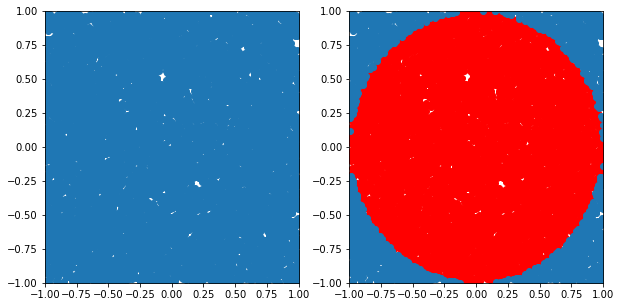

In [10]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)

# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout)